# Space titanic - evaluation exploration

> Aim: Decide on a set of evaluation metrics and plots

## Import packages

In [1]:
import pandas as pd
from joblib import load
from sklearn import metrics

## Prediction

Predict using out trained model (stored as a `.joblib`) the transported passengers in the validation and test dataset.

In [2]:
test = pd.read_csv("../data/processed/test_engineered.csv")
val = pd.read_csv("../data/processed/val_engineered.csv")
clf = load("../model/model.joblib")

In [3]:
X_val = val.drop(columns="transported")
y_val = val["transported"]
y_pred = clf.predict(X_val)

In [4]:
y_test = clf.predict(test.drop(columns="passengerid"))

## Evaluation

The Kaggle competition evaluates the predictions using an accuracy. I include the F1 score and precision/recall out of interest to compare the performance model across improvement iterations.

In [5]:
print(f"Accuracy: {metrics.accuracy_score(y_val, y_pred)}")
print(f"F1 score: {metrics.f1_score(y_val, y_pred)}")
print(f"Precision: {metrics.precision_score(y_val, y_pred)}")
print(f"Recall: {metrics.recall_score(y_val, y_pred)}")

Accuracy: 0.7994480220791168
F1 score: 0.793755912961211
Precision: 0.811411992263056
Recall: 0.7768518518518519


It's interesting to take a look at the ROC curve as well. However, for the engineered part of the evaluation pipeline, I will omit this for simplicity.

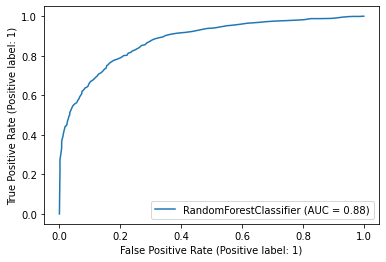

In [6]:
metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val) 

We need to create a submission `.csv` for the test predictions to submit to Kaggle.

In [7]:
submission = pd.DataFrame({"PassengerId": test["passengerid"], "Transported": y_test})
submission["Transported"] = submission["Transported"].astype(bool)
submission.to_csv("../data/output/submission.csv", index=False)